<a href="https://colab.research.google.com/github/MiguelOrtega630/IA_2025/blob/main/Clase_29_de_Octubre_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Variable objetivo detectada: median_house_value

🌳 Árbol de Decisión (Regresión)
RMSE (test): 74784.78
R² (test): 0.573

🔎 Importancia de variables (Regresión):
median_income         0.784729
longitude             0.089048
housing_median_age    0.062102
latitude              0.060573
households            0.003547
total_rooms           0.000000
population            0.000000
total_bedrooms        0.000000
dtype: float64


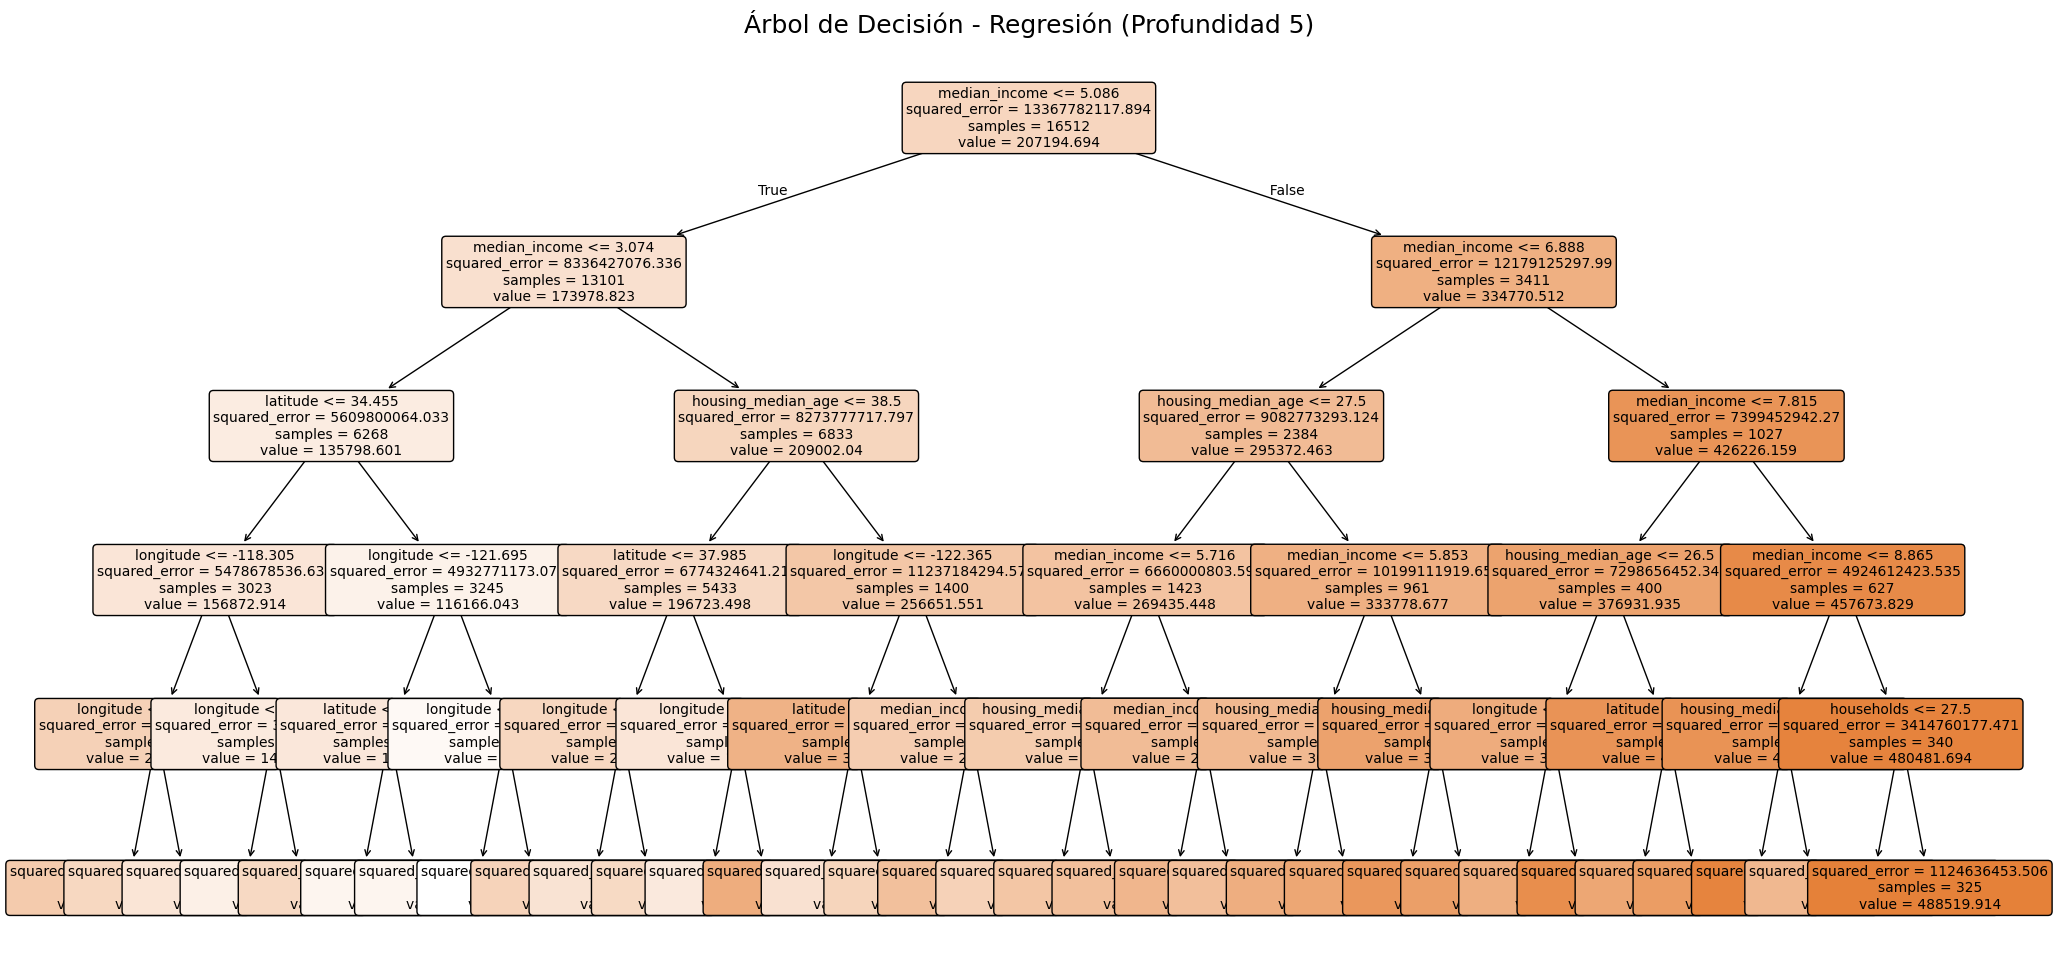


Límites de clases (cuantiles): [ 14999.         141400.         230333.33333333 500001.        ]

🌳 Árbol de Decisión (Clasificación)
Accuracy (test): 0.700
Matriz de confusión:
 [[1104  246   27]
 [ 275  873  227]
 [  69  393  914]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1377
           1       0.58      0.63      0.60      1375
           2       0.78      0.66      0.72      1376

    accuracy                           0.70      4128
   macro avg       0.71      0.70      0.70      4128
weighted avg       0.71      0.70      0.70      4128


🔎 Importancia de variables (Clasificación):
median_income         0.574353
longitude             0.235393
latitude              0.188853
households            0.001400
total_rooms           0.000000
housing_median_age    0.000000
population            0.000000
total_bedrooms        0.000000
dtype: float64

Impureza GINI global del conjunto: 0.6667


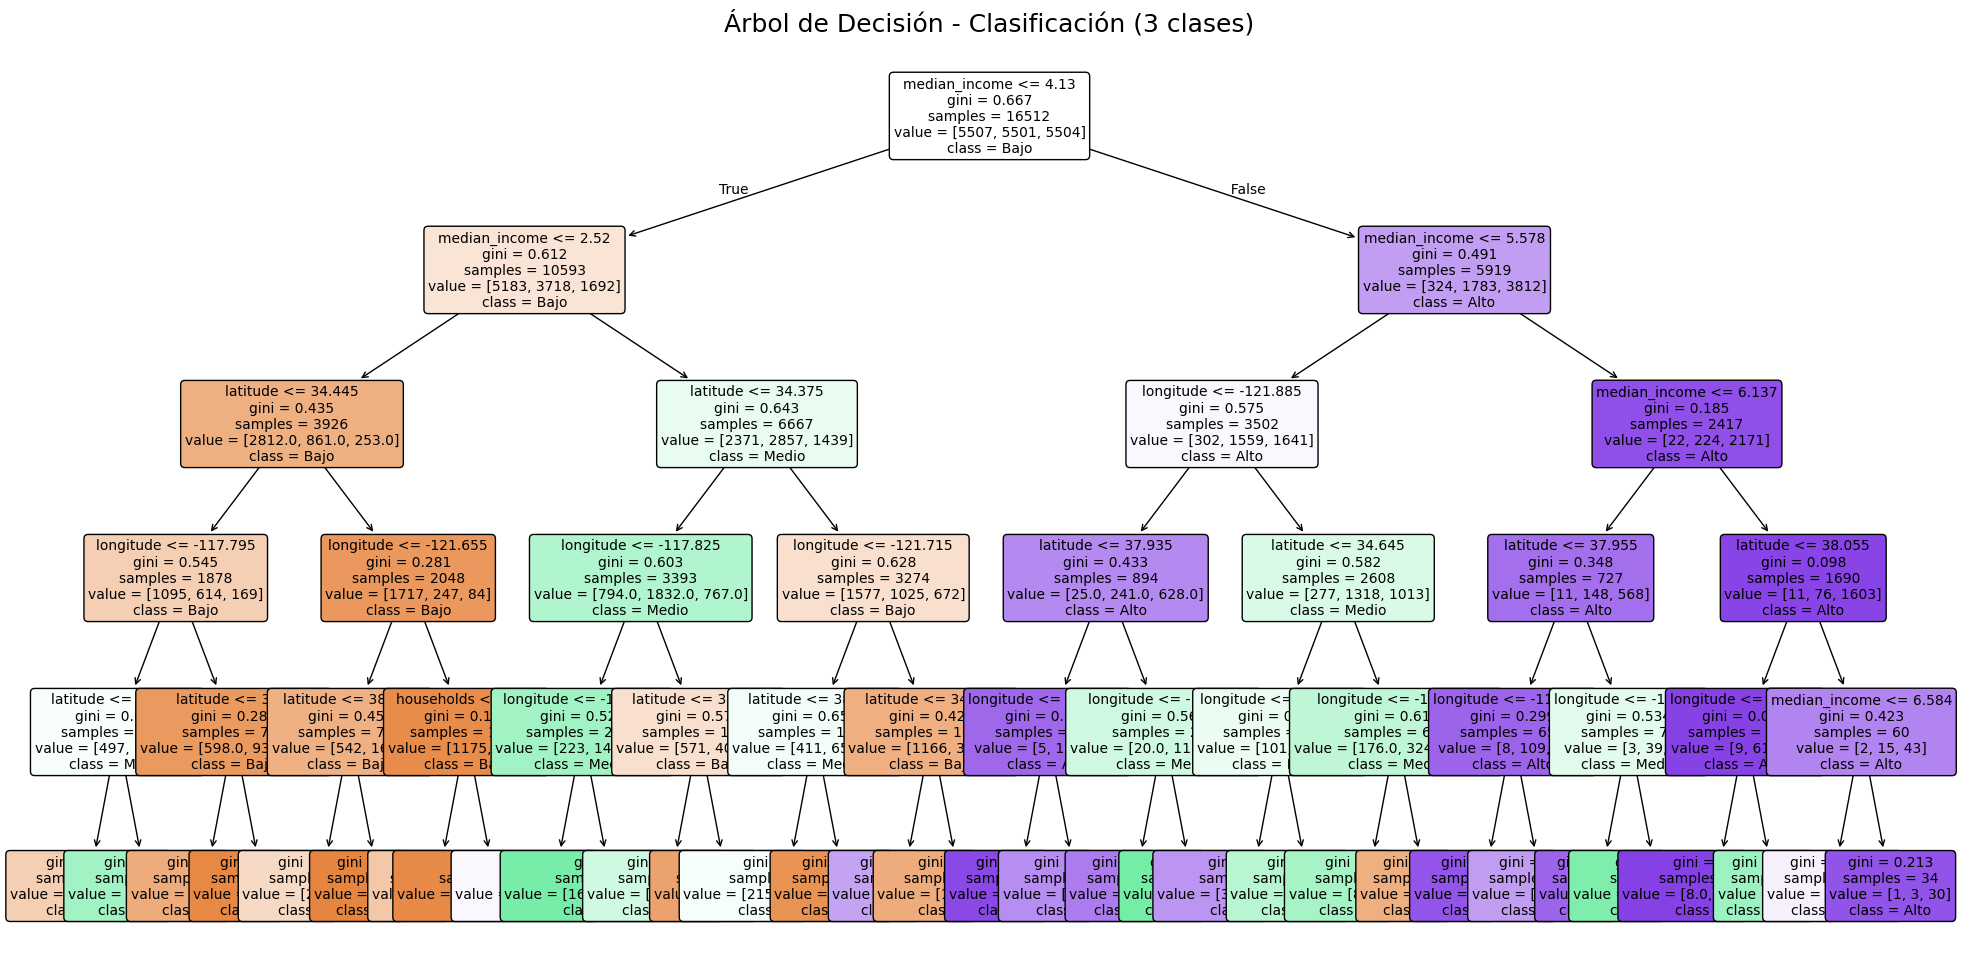


🔍 Buscando mejores hiperparámetros (puede tardar unos minutos)...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

✅ Mejores parámetros encontrados:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
RMSE (validación cruzada): 60075.97
RMSE (test): 61022.21
R² (test): 0.716

🔎 Importancia de variables (mejor modelo):
median_income         0.574569
latitude              0.164172
longitude             0.152488
housing_median_age    0.053755
population            0.021377
total_bedrooms        0.018806
total_rooms           0.008917
households            0.005915
dtype: float64


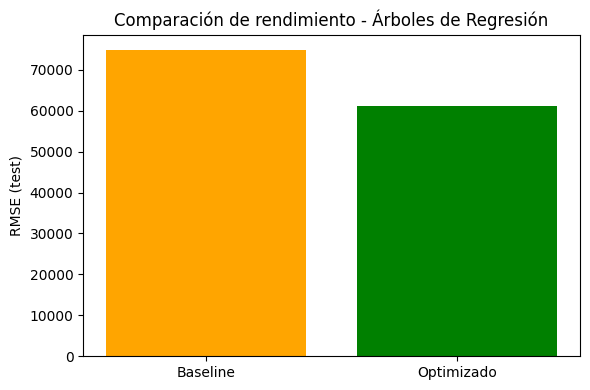


El árbol optimizado es muy profundo, no se muestra completo para evitar saturar la salida.

📊 Resumen general de modelos:
                Modelo     RMSE_test   R2_test  Accuracy  Gini_global
0      Árbol Regresión  74784.779218  0.573205       NaN          NaN
1  Árbol Clasificación           NaN       NaN  0.700339     0.666667
2     Árbol Optimizado  61022.212379  0.715836       NaN          NaN


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


file_path = "/content/housing.csv"
df = pd.read_csv(file_path)

possible_targets = ['median_house_value', 'price', 'median_price', 'house_value']
target = next((t for t in possible_targets if t in df.columns), None)
if target is None:
    raise ValueError("⚠️ No encontré ninguna columna de precio objetivo.")

print(f"✅ Variable objetivo detectada: {target}")


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in numeric_cols if c != target]

X = df[features].fillna(df[features].median())
y = df[target].fillna(df[target].median())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n🌳 Árbol de Decisión (Regresión)")
print(f"RMSE (test): {rmse:.2f}")
print(f"R² (test): {r2:.3f}")


importances_reg = pd.Series(tree_reg.feature_importances_, index=features).sort_values(ascending=False)
print("\n🔎 Importancia de variables (Regresión):")
print(importances_reg.head(10))


plt.figure(figsize=(24, 12))
plot_tree(tree_reg, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión - Regresión (Profundidad 5)", fontsize=18)
plt.show()


y_class, bins = pd.qcut(y, q=3, labels=False, retbins=True, duplicates='drop')
print("\nLímites de clases (cuantiles):", bins)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(Xc_train, yc_train)
yc_pred = tree_clf.predict(Xc_test)

acc = accuracy_score(yc_test, yc_pred)
print("\n🌳 Árbol de Decisión (Clasificación)")
print(f"Accuracy (test): {acc:.3f}")
print("Matriz de confusión:\n", confusion_matrix(yc_test, yc_pred))
print("\nReporte de clasificación:\n", classification_report(yc_test, yc_pred))


importances_clf = pd.Series(tree_clf.feature_importances_, index=features).sort_values(ascending=False)
print("\n🔎 Importancia de variables (Clasificación):")
print(importances_clf.head(10))

probs = np.bincount(y_class) / len(y_class)
gini_global = 1 - np.sum(probs**2)
print(f"\nImpureza GINI global del conjunto: {gini_global:.4f}")

plt.figure(figsize=(24, 12))
plot_tree(tree_clf, feature_names=features, filled=True, class_names=["Bajo", "Medio", "Alto"], rounded=True, fontsize=10)
plt.title("Árbol de Decisión - Clasificación (3 clases)", fontsize=18)
plt.show()


param_grid = {
    "max_depth": [3, 5, 7, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

print("\n🔍 Buscando mejores hiperparámetros (puede tardar unos minutos)...")

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best = grid.best_estimator_
best_params = grid.best_params_
best_rmse_cv = np.sqrt(-grid.best_score_)


y_pred_best = best.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\n✅ Mejores parámetros encontrados:")
print(best_params)
print(f"RMSE (validación cruzada): {best_rmse_cv:.2f}")
print(f"RMSE (test): {rmse_best:.2f}")
print(f"R² (test): {r2_best:.3f}")


importances_best = pd.Series(best.feature_importances_, index=features).sort_values(ascending=False)
print("\n🔎 Importancia de variables (mejor modelo):")
print(importances_best.head(10))


plt.figure(figsize=(6,4))
plt.bar(["Baseline", "Optimizado"], [rmse, rmse_best], color=["orange", "green"])
plt.ylabel("RMSE (test)")
plt.title("Comparación de rendimiento - Árboles de Regresión")
plt.tight_layout()
plt.show()


if best.get_params().get("max_depth") and best.get_params()["max_depth"] <= 6:
    plt.figure(figsize=(24, 12))
    plot_tree(best, feature_names=features, filled=True, rounded=True, fontsize=10)
    plt.title("Árbol Optimizado (Regresión)", fontsize=18)
    plt.show()
else:
    print("\nEl árbol optimizado es muy profundo, no se muestra completo para evitar saturar la salida.")



summary = pd.DataFrame({
    "Modelo": ["Árbol Regresión", "Árbol Clasificación", "Árbol Optimizado"],
    "RMSE_test": [rmse, np.nan, rmse_best],
    "R2_test": [r2, np.nan, r2_best],
    "Accuracy": [np.nan, acc, np.nan],
    "Gini_global": [np.nan, gini_global, np.nan]
})

print("\n📊 Resumen general de modelos:")
print(summary)